# Spam emails: Naive Bayes Model


## Name: Anas Kouri

# Importing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading csv files
data =  pd.read_csv('spambase.data', sep=",")

In [ ]:
data.head(10)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
5,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,0.96,1.28,0.00,0.00,0.00,0.96,0.00,0.32,3.85,0.00,0.64,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
6,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
7,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,0.76,0.92,0.00,0.00,0.00,0.00,0.00,0.15,1.23,3.53,2.00,0.0,0.00,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.30,0.00,0.00,0.00,0.0,0.0,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
8,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,0.00,0.64,0.25,0.00,0.12,0.00,0.00,0.12,1.67,0.06,0.71,0.0,0.19,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.06,0.00,0.00,0.0,0.0,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1
9,0.00,0.00,0.00,0.0,0.00,0.00,0.96,0.00,0.00,1.92,0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.96,3.84,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.96,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.462,0.000,0.000,1.312,6,21,1


# Data Cleaning


Firstly, let's rename all columns, based on the information listed in the dataset.  We have:

- 48 columns: percentage of words in the e-mail that match WORD.

- 6 columns: percentage of characters in the e-mail that match CHAR.
- 1 column: average length of uninterrupted sequences of capital letters.
- 1 column: length of longest uninterrupted sequence of capital letters.
- 1 column: total number of capital letters in the e-mail.
- 1 column: the last column is the label, whether the e-mail was considered spam (1) or not (0).

In [ ]:
column_indices = [i for i in range(48)]
new_names = ['word_'+str(id) for id in range(1,49) ]
old_names = data.columns[column_indices]
data.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [ ]:
column_indices = [48,49,50,51,52,53]
new_names = ['char_'+str(id) for id in range(1,7) ]
old_names = data.columns[column_indices]
data.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [ ]:
column_indices = [54,55,56,57]
new_names = ['avg_len_capita','long_len_capita','total_num_capital','label' ]
old_names = data.columns[column_indices]
data.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head().T

,0,1,2,3,4
word_1,0.210,0.060,0.000,0.000,0.000
word_2,0.280,0.000,0.000,0.000,0.000
word_3,0.500,0.710,0.000,0.000,0.000
word_4,0.000,0.000,0.000,0.000,0.000
word_5,0.140,1.230,0.630,0.630,1.850
word_6,0.280,0.190,0.000,0.000,0.000
word_7,0.210,0.190,0.310,0.310,0.000
word_8,0.070,0.120,0.630,0.630,1.850
word_9,0.000,0.640,0.310,0.310,0.000
word_10,0.940,0.250,0.630,0.630,0.000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   word_1             4600 non-null   float64
 1   word_2             4600 non-null   float64
 2   word_3             4600 non-null   float64
 3   word_4             4600 non-null   float64
 4   word_5             4600 non-null   float64
 5   word_6             4600 non-null   float64
 6   word_7             4600 non-null   float64
 7   word_8             4600 non-null   float64
 8   word_9             4600 non-null   float64
 9   word_10            4600 non-null   float64
 10  word_11            4600 non-null   float64
 11  word_12            4600 non-null   float64
 12  word_13            4600 non-null   float64
 13  word_14            4600 non-null   float64
 14  word_15            4600 non-null   float64
 15  word_16            4600 non-null   float64
 16  word_17            4600 

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state =0)

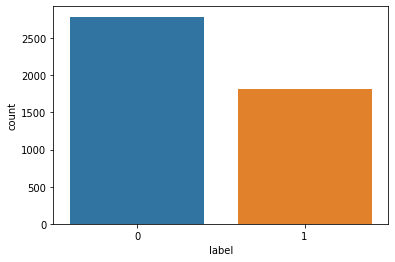

In [ ]:
sns.countplot(data=data,x='label')

# Feature scaling

In [ ]:
# we are going to use Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Naive Bayes model on the training set

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train,y_train)

MultinomialNB()

In [ ]:
predictions = naive_bayes.predict(X_test)

In [ ]:
y_pred = naive_bayes.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Calculating the Confusion Matrix and the Accuracy

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9052173913043479
Precision score: 0.958005249343832
Recall score: 0.7969432314410481
F1 score: 0.8700834326579261


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[676  16]
 [ 93 365]]


0.9052173913043479

So the model has 90% accuracy 